#**Application of Python in Solving Game Theory Problems**
**Econ 211 Intelligent Economics: Code Storytelling** 

**Feature picture:**

<div align="center">
<img src='https://s3.bmp.ovh/imgs/2021/11/f212dc013ea48d60.png', width="570", height="500"></div>


**Abstract**

We solved three types of Game Theory problems, Normal Form Game, Extensive Form Game, and Agent-based Modeling. For each type, one classical game and one game with application scenario were provided. The specific tools we used are three Python-based tools including NashPy, QuantEcon, and Mesa, and one drawing tool to solve game theory related problems, named Game Theory Explorer. 


**Key term:** Game Theory, Python



# 1. Abstract and Solve for Normal Form Game

**A: Classical normal form game: Battle of sexes (Noam Nisan et. al, 2007, p.7 )**

Consider that two players, a boy and a girl, are deciding on how to spend their evening. They both consider two possibilities: going to a baseball game or going to a softball game. The boy prefers baseball and the girl prefers softball, but they both would like to spend the evening together rather than separately. Here we express the players’ preferences again via payoffs (benefits) as follows.


<div align="center">
<img src="https://i.loli.net/2021/11/10/6LDJMWemEy3bIN5.png", width="570", height="500">
    </div>
<font face = Times size = 3>
    <center> Fig1: Payoff matrix </center>
    </font>

Clearly, the two solutions where the two players choose different games are not stable – in each case, either of the two players can improve their payoff by switching their action. Then **what are the equilibrium strategies?**

**Please use Nashpy and QuantEcon to get the answers**.

**Answer:**

In [ ]:
#install packages
!pip install --upgrade setuptools
!pip install --upgrade pip
!pip install nashpy
!pip install quantecon

***NashPy:***

In [ ]:
import numpy as np
import nashpy as nash

girl = np.array([[5, 1],   
               [2, 6]]) #row player

boy = np.array([[6, 1],
              [2, 5]])  #column playjier

game = nash.Game(girl,boy)

equilibria = game.support_enumeration()
for eq in equilibria:
  print(eq)

(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([0.375, 0.625]), array([0.625, 0.375]))


***QuantEcon:***

In [ ]:
import quantecon.game_theory as gt

payoff_matrix = np.array([[(5, 6), (1, 1)],
                          [(2, 2), (6, 5)]])

game1 = gt.NormalFormGame(payoff_matrix)

eq = gt.support_enumeration(game1)

print(eq)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


[(array([1., 0.]), array([1., 0.])), (array([0., 1.]), array([0., 1.])), (array([0.375, 0.625]), array([0.625, 0.375]))]


***Explain the results you got from NashPy and QuantEcon:***

1. **How many pure strategy equilibrium?**

2. **How many mixed strategy equilibrium?**

3. **In each equilibrium, how exactly each player play?**

1. Two pure strategy equilibrium.
2. One mixed strategies equilibrium. 
3. In the first pure strategy equilibrium, boy and girl both choose going to baseball game. In the second pure strategy equilibrium, boy and girl both choose going to softball game. In the mixed strategies equilibrium, girl choose going to baseball game with probability of 37.5%, and boy choose going to baseball game with probability of 62.5%.


**B: Normal form game with application scenarios: The miner’s Dilemma (Ittay, 2015)**

*Background:*


An open distributed system can be secured by requiring participants to present proof of work and rewarding them for participation. The Bitcoin digital currency introduced this mechanism, which is adopted by almost all contemporary digital currencies and related services.

A natural process leads participants of such systems to form pools, where members aggregate their power and share the rewards. Experience with Bitcoin shows that the largest pools are often open, allowing anyone to join. It has long been known that a member can sabotage an open pool by seemingly joining
it but never sharing its proofs of work. **The pool shares its revenue with the attacker, and so each of its participants earns less.**


*Game Formulation:*

In the paper, the authors define and analyze a game where pools use some of their participants to infiltrate other pools and perform such an attack. With any number of pools, no-pool-attacks is not a Nash equilibrium. They study the special cases where either two pools or any number of identical pools play the game and the rest of the participants are uninvolved. In both of these cases there exists an equilibrium that constitutes a tragedy of the commons where the participating pools attack one another and earn less than they would have if none had attacked. 

**For two pools, the decision whether or not to attack is the miner’s dilemma, an instance of the iterative prisoner’s dilemma.** The game is played daily by the active Bitcoin pools, which apparently choose not to attack. If this balance breaks, the revenue of open pools might diminish, making them unattractive to participants.

</font>

*The scenario we are going to simulate: Two Pools*

The case we are going to analyze is the case where two pools may attack each other and the other miners mine solo. This scenario is illustrated in the figure below.


<div align="center">
<img src="https://i.loli.net/2021/07/07/7Cpvyw3xOqQ8NoD.png" >
    </div>
<font face = Times size = 3>
    <center> Fig2: Two pools infiltrating each other </center>
    </font>



In this scenario we have pool 1 of size $m_{1}$ and pool 2 of size $m_{2}$; pool 1 controls its infiltration rate $x_{1,2}$ of pool 2, but now pool 2 also controls its infiltration rate $x_{2,1}$ of pool 1. 

*The Prisoner's Dilemma:*

In a healthy Bitcoin environment, **where neither pool controls a strict majority of the mining power, both pools will earn less at equilibrium than if both pools ran without attacking.** We can analyze in this case a game where each pool chooses either to attack and optimize its revenue, or to refrain from attacking.

Consider pool 1 without loss of generality. As we have seen in Section $\mathrm{V}$, if pool 2 does not attack, pool 1 can increase its revenue above 1 by attacking. If pool 2 does attack but pool 1 does not, we denote the revenue of pool by $\tilde{r}_{1}$. The exact value of $\tilde{r}_{1}$ depends on the values of $m_{1}$ and $m_{2}$, but it is always smaller than one. As we have seen above, if pool 1 does choose to attack, its revenue increases, but does not surpass one. The game is summarized in Figure 2 below.

<div align="center">
<img src="https://i.loli.net/2021/11/15/W6gSzspJLloQMZr.png" 
    </div>



<font face = Times size = 3>
<center> Fig3: Prisoner’s Dilemma for two pools. The revenue density of each pool is determined by the decision of both pools whether to attack or not. The dominant strategy of each player is to attack, however the payoff of both would be larger if they both refrain from attacking.
    </font>


**Answer:**

***NashPy***:

In [ ]:
import numpy as np
import nashpy as nash

pool2 = np.array([[1, 0],
              [2, 0.5]])

pool1 = np.array([[1, 2],
              [0, 0.5]])

game = nash.Game(pool2, pool1)

equilibria = game.support_enumeration()
for eq in equilibria:
  print(eq)

(array([0., 1.]), array([0., 1.]))


***QuantEcon:***

In [ ]:
import quantecon.game_theory as gt
import numpy as np

dilemma_matrix = np.array([[(1, 1), (0, 2)],
                           [(2, 0), (0.5, 0.5)]])

g_MD = gt.NormalFormGame(dilemma_matrix)

NE = gt.support_enumeration(g_MD)

print(NE)

[(array([0., 1.]), array([0., 1.]))]


***Explain the results you got from NashPy and QuantEcon:***

1. **How many pure strategy equilibrium?**

2. **How many mixed strategy equilibrium?**

3. **In each equilibrium, how exactly each player play?**

***Interpretation:***
1. One pure strategy equilibrium.

2. No mixed strategy equilibrium.

3. In the pure strategy equilibrium, each player will choose to attack.

# 2. Abstract and Solve for Extensive Form Game 
**A. Classical extensive form game: Game of moving (Noam Nisan et. al, 2007, pp. 67-68)**


What are extensive games? The basic structure of an extensive game is a directed tree. The nodes of the tree represent game states. Trees (rather than general graphs) are used because then a game state encodes the full history of play. Only one player moves at any one state along a tree edge. The game starts at the root (initial node) of the tree and ends at a leaf (terminal node), where each player receives a payoff. The nonterminal nodes are called decision nodes. A player’s possible moves are assigned to the outgoing edges of the decision node. The decision nodes are partitioned into information sets. All nodes in an information set belong to the same player, and have the same moves. The interpretation is that when a player makes a move, he only knows the information set but not the particular node he is at.

Here is an extensive game. There are two players. The two information sets of player 1 have move sets {L, R} and {S, T}, and the information set of player 2 has move set {l, r}. A play of the game may proceed by player 1 choosing L, player 2 choosing r, and player 1 choosing S, after which the game terminates with payoffs 5 and 6 to players 1 and 2. If player 1 chooses L, player 2 chooses l, and player 1 chooses S, player 1 and player 2 both get 2. If player 1 chooses L, player 2 chooses l, and player 1 chooses T, player 1 gets 0 and player 2 gets 3.  If player 1 chooses L, player 2 chooses r, and player 1 chooses T, player 1 gets 6 and player 2 gets 1. However, if player 1 chooses R in the first step, then no matter what player 1 and player 2 choose next, they end up with a payoff of 3. Below are two strategic forms for player 1 and player 2 for your information. (Notice: it is like the chess game, which means players know the others' previous choices)

<div align="center">
<img src= "https://i.loli.net/2021/11/10/C5TLPB974RhrxOc.png">
    </div>


<font face = Times size = 3>
<center>  Fig4: A refers to player1's strategic form, and B refers to player2's strategic form. 
    </font>


**Please use Game Theory Explorer (GTE) to draw the directed tree based on the game rule, and GTE will provide you with the strategic form and equilibrium strategies. Show your directed tree, strategic form and equilibrium strategies. And explain briefly equilibrium strategies**.

**Answer:**

**Directed tree (Game tree):**

<div align="center">
<img src= "https://i.loli.net/2021/11/11/mU6nGqCHcuiWfpA.png", width="400", height="500">
    </div>

**Strategic form:**

<div align="center">
<img src="https://i.loli.net/2021/11/11/EPiI2pCt5dxOZBY.png", width="400", height="500">
    </div>


**Strategic Form Equilibrium Strategies:**
Note: please insert the screenshot and briefly explain

<div align="center">
<img src="https://i.loli.net/2021/11/11/dFEjistIrBxbo5W.png", height="500">
    </div>
Matrix A refers to player 1's strategic form, and matrix B refers to player 2's strategic form. 

**Brief explanation:**
1. How many pure strategy equilibrium?

2. How many mixed strategy equilibrium?

3. In each equilibrium, how exactly each player play?

There are two mixed strategy equilibrium and one pure strategy equilibrium. In the first mixed strategy equilibrium, player 1 plays L and S at probability of 1/3, plays L and T at probability of 2/3. Player 2 plays l at probability of 1/3. In the second mixed strategy equilibrium, player 1 plays R and player 2 plays l with probability of 2/3. In the pure strategy equilibrium, player 1 plays R and player 2 plays l. 


**Subgame Perfect Nash Equilibrium (SPNE):**
Note: please insert the screenshot and briefly explain

<div align="center">
<img src="https://i.loli.net/2021/11/17/mOvY3wNn7gJHlCj.png", width="500", height="400">
    </div>

In SPNE, Player 1's strategy at each node (from top to bottom and left to right)is {R, S, T, S, S}; Player 2's strategy is {l,l}. If SPNE is played, Player 1 chooses R, then Player 2 choose l, and finally Player 1 choose S. Both players get the payoff of 3. 

**B.  Form game with application scenarios: Finite Blockchain game (Ewerhart et al. 2020)**


*Formal model of the blockchain:*

Suppose there are $n \geq 2$ miners, collected in a set $N=\{1, \ldots, n\} .$ We will use the following model of a blockchain (cf. Biais et al., 2019$)$.

*Definition 1*. A blockchain $\mathbb{B}$ consists of
(i) a sequence of blocks $B=\left\{b_{0}, b_{1}, \ldots, b_{T}\right\}$, where $T \geq 0$

(ii) a parent-child relation $\Leftarrow$ on $B$;

(iii) an assignment map $\iota: B \backslash\left\{b_{0}\right\} \rightarrow N$.

Thus, a blockchain $\mathbb{B}$ consists of $(T+1)$ blocks, where $T$ is the time horizon. The block $b_{0}$ is referred to as the genesis block. Any two blocks may be related to each other by a parent-child relationship. Finally, each block except the genesis block has a miner assigned to it. An example of a blockchain is shown in Figure 5 . The numbers close to the circles are the respective miner assignments.

<div align="center">
<img src= "https://i.loli.net/2021/11/10/kSnGe6JyTENc8VI.png", width=500>
    </div>
  
<font face = Times size = 3>
<center> Fig5: Blockchain
    </font>

We will impose the following two additional requirements:
(a) each block except the genesis block $b_{0}$ has precisely one parent, i.e., for any $t^{\prime}>0$, there is precisely one $t$ such that $b_{t} \Leftarrow b_{t^{\prime}}$
(b) the parent has a lower index than the child, i.e., $b_{t} \Leftarrow b_{t^{\prime}}$ implies $t<t^{\prime}$.
Popular mining strategies are based on the notion of a chain. A chain of length $K \geq 1$ in the blockchain $\mathbb{B}$ is a set $C=\left\{b^{(0)}, \ldots, b^{(K)}\right\}$ such that $b^{(k-1)} \Leftarrow b^{(k)}$ for $k=1, \ldots, K$. The original chain starts at $b_{0}$ and, if there is more than one child to a given parent, continues with the child with the lowest index. E.g., in the example shown in Figure 1 , the original chain is $C^{\text {org }}=\left\{b_{0}, b_{1}, b_{2}, b_{4}\right\}$. A longest chain is a chain in blockchain $\mathbb{B}$ for which $K$ is maximal. Clearly, any longest chain starts at $b_{0}$. If a longest chain is unique, it is referred to as the longest chain in $\mathbb{B}$. In the example shown in Figure 1, there are two longest chains, viz. $C_{1}=\left\{b_{0}, b_{1}, b_{3}, b_{6}, b_{7}\right\}$ and $C_{2}=\left\{b_{0}, b_{1}, b_{2}, b_{5}, b_{8}\right\}$

*Finite blockchain games:*

Suppose the $n$ miners incrementally construct a blockchain $\mathbb{B}$ by interacting over $T \geq 1$ stages. We denote the intermediate blockchains as $\mathbb{B}_{0}, \mathbb{B}_{1}, \ldots, \mathbb{B}_{T}$ At the start of the game, $\mathbb{B}_{0}$ consists only of the genesis block, so that $B_{0}=\left\{b_{0}\right\}$, and both $\Leftarrow_{0}$ and $\iota_{0}$ are empty. Next, at any intermediate stage $t \in\{1,2, \ldots, T\}, \mathbb{B}_{t}$ is constructed from the existing blockchain $\mathbb{B}_{t-1}$ as follows. Each miner $i \in N$ selects a block $\widehat{b}_{t-1}(i) \in B_{t-1}$ from the existing set of blocks $B_{t-1} .$ **Then, a fair random draw selects the winning miner $i_{t}^{*} \in N$ of stage $t .{ }$** The new block $b_{t}$ is assigned to $i_{t}^{*}$. Moreover, it is appended as a child to the block $\widehat{b}_{t-1}\left(i_{t}^{*}\right)$ chosen by the winning miner. Figure 2 illustrates the incremental build-up process of the blockchain.

<div align="center">
<img src="https://i.loli.net/2021/11/10/erQhIyDRUnVPdvM.png",width="500", height="500">
<div>
<font face = Times size = 3>
<center> Fig6: Blockchain Construction
    </font>


*Miners' payoffs:*

Miners' payoffs are determined as follows. After stage $T$, one of the longest chains $C$ in the blockchain $\mathbb{B}_{T}$ is drawn with equal probability. Each miner $i \in N$ receives one token for each block $b \in C \backslash\left\{b_{0}\right\}$ assigned to him. Miners are risk-neutral and maximize the expected number of tokens they receive.

The stochastic game introduced above will be referred to as a finite $n$-miner blockchain game. Note that, given the possibility of forking and orphan blocks, the game is not constant-sum, i.e., there are gains from coordination.

**Question:**

**You are asked to draw a Blockchain by using GTE (Game Theory Explore) http://app.test.logos.bg/. After successfully drawing the blockchain, please upload the figure you created. The Blockchain you draw should meet the follwing requirements:**


1.   **$n (miners) = 3$ and $T (stages) = 6$**
2.   **Two branches.**
3.   **Miner 1 in one branch with two nodes assigned**
4.   **Miner 2 with one node assigned followed by Miner 3 with two nodes assigned in the other branch:**


**Answer:**

***Please upload (visualize) your blockchain here:***

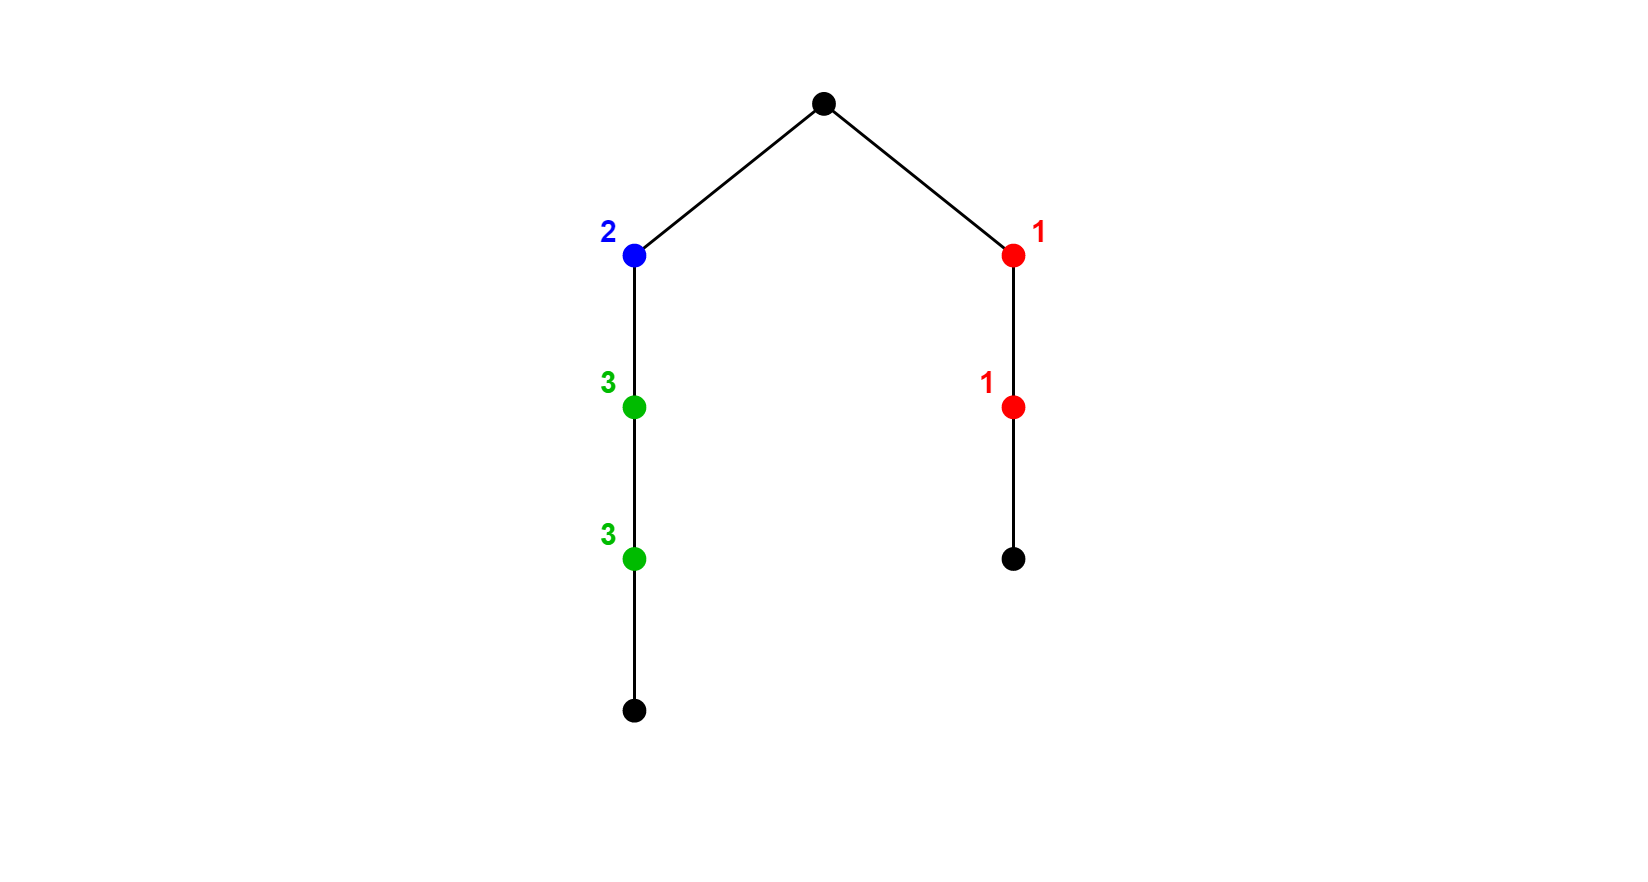


***Please explain which branch Miner 1 will choose in order to maximize his or her payoffs and the rationale:***


At the final stage T = 6, miner i = 1 would work on the right node, because this allows her to
win three tokens with probability 1/2 in the case that she wins
the last stage. In contrast, working on the left node and thereby following
the longest-chain rule would allow her to win one token with
probability one in the case that she wins the last stage, which is
strictly less in expectation. Thus, in the subgame, miner 1 has a
strict incentive to deviate from the longest-chain rule.

# 3. Simulate Agent-based Modelling in Mesa
**A. Classical evolutionary game: The evolutionary equilibrium of block withholding attack  (Cheng et. al, 2021)**


Bitcoin is the most famous and the most used cryptocurrency in the world, such that it has received extreme popularity in recent years. However the Bitcoin system is accompanied by different attacks, including the block withholding (BWH) attack. 

Generally, there are many miners in a Bitcoin mining pool. Since this work only concentrates on two strategies: One is honestly mining (C) and the other is the BWH attack (A), let us assume that there are two participants: Miner 1 and Miner 2. Each of whom has aforementioned two strategies. Therefore, we construct an evolutionary game model, in which there are four strategy profiles: (C, C), (C, A), (A, C) and (A, A). Different strategy profiles would bring different payoffs to each miner, and you may find that is similar to prisoner’s dilemma. Differently, this is an evolutionary game. **During the evolutionary game, the miners keep learning to adjust their low-income strategies and to imitate the strategy choice of the miner, who has a higher income, until the strategy profile of two miners reaches a stable state**. To establish the evolutionary game model between two miners formally, some parameters are necessary to be introduced.

1) Miner 1 and Miner 2 have **a1** and **a2** units of computational power, respectively. And we assume that **a2 = λa1**, where **λ ∈ [0, 1]**.

2)  The reward the mining pool obtains per unit computational power per unit time is **R**.

3)  When the miner honestly mines, the cost of computational power per unit time to mine is **C1 (C1 > 0)**. If the miner employs the BWH attack, the mining cost per unit time it consumes is **C2 (0 ≤ C2 < C1)**.

4)  If both of the two miners honestly mine, then the probability to dig up the legal block will increase, which leads to the improvement of the expected profit. Thus we assume that the miners’ cooperation with each other would enlarge **γ** multiples of reward **(γ > 1)**.

5)  To encourage the miners to cooperate, the pool manager will draw an additional reward from the reward **R** to offer to the one who honestly mines. We assume the additional reward per unit computational power per unit time to be **δR**, where **δ ∈ (0, 1)**.

Based on these parameters and descriptions, we can get the payoff matrix of the model.

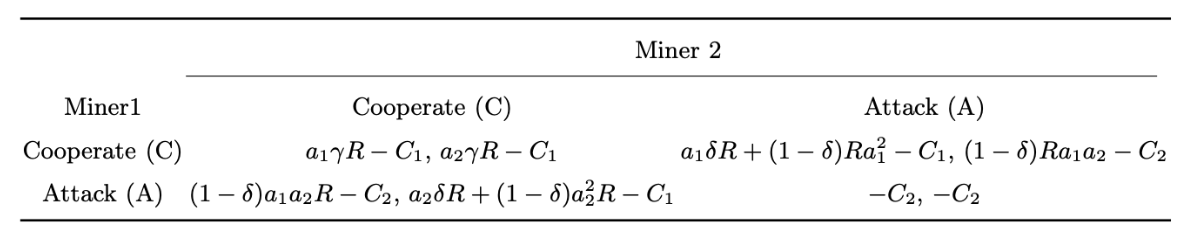


In the established evolutionary game model, the two miners have two strategies and different payoffs. Let **x** and **y**, **0 ≤ x ≤1, 0 ≤ y ≤1**, be the probabilities of Miner1 and Miner2 to play the strategy of cooperation, respectively. Therefore, the possibilities to employ the BWH attack of Miner 1 and Miner 2 are **1 − x** and **1 − y**, respectively.

Denote the payoffs of Miner 1 when it takes the strategy of cooperation and adopts the BWH attack by **U11** and **U12**, respectively. By the payoff matrix, 

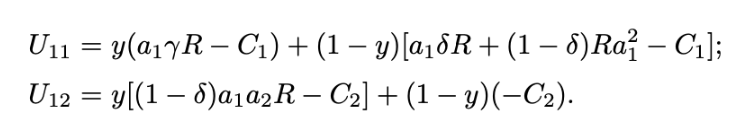

Hence, the average expected payoff of Miner 1 is

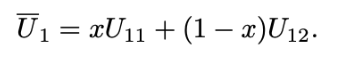

Similarly, **U21,  U22**, and average expected payoff of Miner 2 are 

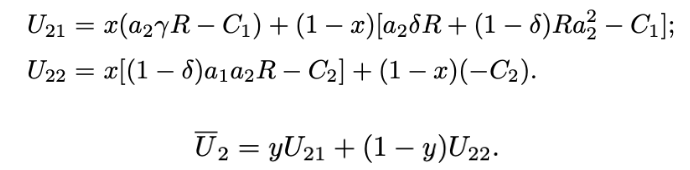


**As mentioned before, during the evolutionary game, the miners keep learning to adjust their low-income strategies and to imitate the strategy choice of the miner, who has a higher income, until the strategy profile of two miners reaches a stable state, which means Miner 1 and Miner 2 tend to change their decision (change of x, y) based on the their payoff in the last round. In this model, the changes of x and y for the next round are related to the payoff of miners in this round, which are**

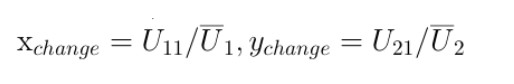

**Now, we can use mesa to deploy this case. Please fill out the codes to see what the stable state is when δ = 0.2, a1 = 0.6, a2 = 0.4,  γ = 2, R = 10, C1 = 4, C2 = 1, and the initial x and y are 0.1 and 0.8**. 


**Answer:**

Insert the figure of psedo-code here and explain it.

There are two players in this evolutionary game which will repeat 100 times. At the beginning, the probabilities of choosing operation of player1 and player2 are x and y. Based on that, they start to do the first round decision and we can calculate the $U_{11}$, $U_{12}$, $U_{21}$, and $U_{22}$ by $x$, $y$, and other fixed parameters, and then calculate the $\overline{U_{1}}$ and $\overline{U_2}$, which are the average expected payoff of player1 and player2. Next, we use $U_{11}$, $\overline{U_{1}}$, $U_{21}$, $\overline{U_2}$ to get the change rate of $x$ and $y$, multiply the change rate of $x$ and $x$, multiply the change rate of $y$ and $y$, to get the new $x$ and $y$ for the next round. The next 99 rounds follow the same procedure.

<img src="https://i.loli.net/2021/11/11/7locTR4HgyqQUaj.png">

In [ ]:
#install package
!pip install mesa

     |████████████████████████████████| 668 kB 24.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector

In [ ]:
class BlockWithholdingAttackAgent(Agent):

    def __init__(self, unique_id, model, sigma, a1, a2, gamma, R, C1, C2):
        super().__init__(unique_id, model)
        self.sigma = sigma; self.a1 = a1; self.a2 = a2
        self.lbd = a2 / a1; self.gamma = gamma
        self.R = R; self.C1 = C1; self.C2 = C2

        self.x = 0.1; self.y = 0.8

    def generate_x_change_rate(self): 
        U11 = self.y*(self.a1*self.gamma*self.R-self.C1)+(1-self.y)*(self.a1*self.sigma*self.R+(1-self.sigma)*self.R*self.a1**2-self.C1)
        U12 = self.y*((1-self.sigma)*self.a1*self.a2*self.R-self.C2)+(1-self.y)*(-self.C2)
        U1averge = self.x * U11 + (1-self.x) * U12
        x_change_rate = U11 / U1averge
        return x_change_rate

    def generate_y_change_rate(self):
        U21 = self.x*(self.a2*self.gamma*self.R-self.C1)+(1-self.x)*(self.a2*self.sigma*self.R+(1-self.sigma)*self.R*self.a2**2-self.C1)
        U22 = self.x*((1-self.sigma)*self.a1*self.a2*self.R-self.C2)+(1-self.x)*(-self.C2)
        U2averge = self.y * U21 + (1-self.y) * U22
        y_change_rate = U21 / U2averge
        return y_change_rate


    def generate_x(self):
        x = self.x * self.generate_x_change_rate()
        return x

    def generate_y(self):
        y = self.y * self.generate_y_change_rate()
        return y

    def step(self):
        x = self.generate_x(); y = self.generate_y()
        self.x = x; self.y = y
        self.model.x = x; self.model.y = y
        result = (x, y)
        return result

class BlockWithholdingAttackModel(Model):

    def __init__(self, sigma, a1, a2, gamma, R, C1, C2):
        self.num_agent = 2
        self.schedule = RandomActivation(self)

        for i in range(self.num_agent):
            a = BlockWithholdingAttackAgent(i, self, sigma, a1, a2, gamma, R, C1, C2)
            self.schedule.add(a)

    def step(self) -> None:
        self.schedule.step()

In [ ]:
if __name__ == '__main__':
    model = BlockWithholdingAttackModel(sigma=0.2, a1=0.6, a2=0.4, gamma=2, R=10, C1=4, C2=1)
    x_list = []; y_list = [];final_result=[]
    for i in range(10):
        model.step()
        x_list.append(model.x)
        y_list.append(model.y)
        final_result.append((model.x,model.y))

**Print the xlist and ylist, and draw a plot to see how x and y change and their stable state:**

In [ ]:
print(x_list)
print(y_list)

[0.5708185053380783, 0.9327838293783137, 0.991870685321869, 0.9990606210273433, 0.9998919411485782, 0.9999875736189238, 0.9999985709921213, 0.999999835664988, 0.9999999811015, 0.9999999978266731]
[0.8679738562091504, 0.9900952320553157, 0.9978081680010886, 0.9994975470771156, 0.9998844570999201, 0.9999734245118115, 0.9999938875587386, 0.9999985941331123, 0.999999676650298, 0.9999999256295511]


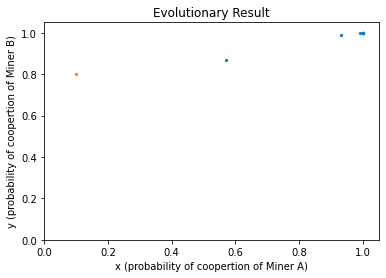

In [ ]:
plt.scatter(x_list,y_list,s=5)
plt.xlim(0,1.05)
plt.xlabel('x (probability of coopertion of Miner A)')
plt.ylim(0,1.05)
plt.ylabel('y (probability of coopertion of Miner B)')
plt.title('Evolutionary Result')
plt.scatter(0.1,0.8,s=5) 
plt.show()

**Text explaination:**

By the print results and plot, we get that x and y both converge to 1 after 100 iterations, so under the conditions δ = 0.2, a1 = 0.6, a2 = 0.4, γ = 2, R = 10, C1 = 4, C2 = 1, the stable state of (x,y) is (1,1), which means Miner 1 and Miner 2 will definitely (probablity = 1) choose cooperation after several iterations. 

**B.Game with application scenarios: Mining Pool Selection (Liu et. al, 2018)**

*Backgrounds:*

In blockchain networks adopting the proof-of-work schemes, the monetary incentive is introduced by the Nakamoto consensus protocol to guide the behaviors of the full nodes (i.e., block miners) in the process of maintaining the consensus about the blockchain state. The block miners have to devote their computation power measured in hash rate in a crypto-puzzle solving competition to win the reward of publishing (a.k.a.,
mining) new blocks. Due to the exponentially increasing difficulty of the crypto-puzzle, individual block miners tends to join mining pools, i.e., the coalitions of miners, in order to reduce the income variance and earn stable profits. 

In this case, we will study the dynamics of mining pool selection in a blockchain network, where mining pools may choose arbitrary block mining strategies. We identify the hash rate and the block propagation delay as two major factors determining the outcomes of mining competition, and then model the strategy evolution of the individual miners as an evolutionary game.

*Problem Formulation:*

*A. Financially Incentivized Block Mining with Proof-of-Work*

We consider a blockchain network adopting the Nakamoto consensus based on Proof-of-Work (PoW). Assume that the network is composed of a large population of $N$ individual miners. For each miner, the chance of mining a new block is in proportion to the ratio between its individual hash rate for solving the crypto-puzzles in PoW and the total hash rate in the network. According to the Nakamoto consensus protocol, the miner of each confirmed block receives a fixed amount of blockchain tokens from the new block's coinbase and a flexible amount of transaction fees as the reward for maintaining the blockchain's consensus and approving the transactions. We consider that the individual miners organize themselves into a set of $M$ mining pools, namely, $\mathcal{M}=\{1,2, \ldots, M\}$ We further consider that each mining pool may set different requirement on the hash rate contributed by an individual miner trying to join the pool. Let $\omega_{i}$ denote the individual hash rate required by pool $i(i \in \mathcal{M})$, and $x_{i}$ denote the miners' population fraction in pool $i$. Then, the probability for pool $i$ to mine a block in one consensus round can be expressed as (1):
$$
\operatorname{Pr}_{i}^{\operatorname{mine}}(\mathrm{x}, \boldsymbol{\omega})=\frac{\omega_{i} x_{i}}{\sum_{j=1}^{M} \omega_{j} x_{j}}
$$
where $\boldsymbol{\omega}=\left[\omega_{1}, \ldots, \omega_{M}\right]^{\top}, \mathbf{x}=\left[x_{1}, \ldots, x_{M}\right]^{\top}, \sum_{i \in \mathcal{M}} x_{i}=$ 1 and $\forall i, x_{i} \geq 0$

After successfully mining a block, pool $i$ broadcasts the mined block to its neighbors in the hope that it will be propagated to the entire network and confirmed as the new head block of the blockchain. However, in the situation where more than one mining pool discover a new block at the same time, only the block that is first disseminated to the network will be confirmed by the network. All of the rest candidate blocks will be discarded (orphaned). According to the empirical studies in, the block propagation time is mainly determined by two factors, namely, the transmission delay over each link and the transaction verification time at each relaying node. For a block of size $s$, the transmission delay can be modeled as $\tau_{p}(s)=\frac{s}{\gamma c}[4]$, where $\gamma$ is a network scale-related parameter, and $c$ is the average effective channel capacity of each link. On the other hand, since verifying a transaction requires roughly the same amount of computation, the block verification time can be modeled as a linear function $\tau_{v}(s)=b s$, where $b$ is a parameter determined by both the network scale and the average verification speed of each node. Then, the average propagation time for a block of size $s$ can be expressed as(2):

$$
\tau(s)=\tau_{p}(s)+\tau_{v}(s)=\frac{s}{\gamma c}+b s
$$

Based on (2), the incidence of abandoned (i.e., orphaning) a valid block due to the propagation delay can be modeled as a Poisson process with mean $1 / T$, where $T$ is maintained by the network as a fixed average mining time (e.g., $600 \mathrm{~s}$ in Bitcoin) $[4]$. Then, the probability of orphaning a valid candidate block of size $s$ in one consensus round is(3):

$$
\operatorname{Pr}^{\text {orphan }}(s)=1-e^{-\tau(s) / T}=1-e^{-\left(\frac{s}{\gamma c}+b s\right) / T}
$$

From (1) and (3), the probability for pool $i$ to ultimately win a block mining race with a block of size $s_{i}$ can be derived as (4):

$$
\operatorname{Pr}_{i}^{\operatorname{win}}\left(\mathrm{x}, \boldsymbol{\omega}, s_{i}\right)=\frac{\omega_{i} x_{i}}{\sum_{j=1}^{M} \omega_{j} x_{j}} e^{-\left(\frac{x_{i}}{\gamma c}+b s_{i}\right) / T}
$$

We assume that the transactions in the blockchain network are issued with an invariant rate of transaction fees. When the transactions are of fixed size, pool $i$ 's mining reward from transaction fee collection can also be modeled as a linear function of the block size $s_{i}$. Let $\rho$ denote the price of transaction in a unit block size [5]. Then, the reward of pool $i$ from transaction fees can be written as $\rho s_{i}$. Let $R$ denote the fixed reward from the new block's coinbase. Then, the expected reward for pool $i$ can be expressed as follows (5):

$$
E\left\{r_{i}\left(\mathbf{x}, \boldsymbol{\omega}, s_{i}\right)\right\}=\left(R+\rho s_{i}\right) \frac{\omega_{i} x_{i}}{\sum_{j=1}^{M} \omega_{j} x_{j}} e^{-\left(\frac{s_{i}}{\gamma_{i}}+b s_{i}\right) / T}
$$

Since the process of crypto-puzzle solving in $\mathrm{PoW}$ is computationally intensive, the rational miners also have to consider the cost of power consumption due to hash computation in the block mining process. Noting that the new blocks are discovered with a roughly fixed time interval, we denote the energy price for generating a unit hash query rate during that time interval by $p$. Then, we can obtain the expected payoff for an individual miner in pool $i$ as follows (6):

$$
y_{i}\left(\mathbf{x}, \boldsymbol{\omega}, s_{i}\right)=\frac{R+\rho s_{i}}{N x_{i}} \frac{\omega_{i} x_{i}}{\sum_{j=1}^{M} \omega_{j} x_{j}} e^{-\left(\frac{x_{i}}{\gamma c}+b s_{i}\right) / T}-p \omega_{i}
$$

*B. Mining Pool Selection as an Evolutionary Game*

Consider that the individual miners are rational and aim to
maximize their net payoff given in (6). Then, it is nature to
model the process of mining pool selection in the population of individual miners as an evolutionary game. Mathematically, we can define the evolutionary game for mining pool selection as a 4-tuple: $\mathcal{G}=\left\langle\mathcal{N}, \mathcal{M}, \mathrm{x},\left\{y_{i}\left(\mathbf{x} ; \boldsymbol{\omega}, s_{i}\right)\right\}_{i \in \mathcal{M}}\right\rangle$, where
- $\mathcal{N}$ is the population of individual miners, $|\mathcal{N}|=N$.
- $\mathcal{M}=\{1,2, \ldots, M\}$ is the set of mining pools, and $\left(w_{i}, s_{i}\right)$ is the mining strategy preference of each pool $i \in \mathcal{M}$
- $\mathrm{x}=\left[x_{1}, \ldots, x_{M}\right]^{\top} \in \mathcal{X}$ is the vector of the population states, where $x_{i}$ represents the fraction of population that choose mining pool $i . \mathcal{X}=\left\{\mathrm{x} \in \mathbb{R}_{+}^{M}: \sum_{i \in \mathcal{M}} x_{i}=1\right\}$
- $\left\{y_{i}\left(\mathbf{x} ; \boldsymbol{\omega}, s_{i}\right)\right\}_{i \in \mathcal{M}}$ is the set of individual miner's payoff in each mining pool. $y_{i}\left(\mathrm{x} ; \boldsymbol{\omega}, s_{i}\right)$ is given by $(6)$.
We note that $\omega_{i}$ and $s_{i}$ form the predetermined mining strategy of pool $i$. Given a population state $\mathrm{x} \in \mathcal{X}$, we can derive the average payoff of the individual miner in $\mathcal{N}$ based on (6) as follows (7):

$$
\bar{y}(\mathrm{x})=\sum_{i=1}^{M} y_{i}\left(\mathrm{x} ; \boldsymbol{\omega}, s_{i}\right) x_{i}
$$

Then, by the pairwise proportional imitation protocol $[7]$, the replicator dynamics for the evolution of the population states can be expressed by the following system of Ordinary Differential Equations (ODEs) $\forall i \in \mathcal{M}$ (8):
$$
\dot{x}_{i}(t)=f_{i}\left(\mathrm{x}(t) ; \boldsymbol{\omega}, s_{i}\right)=x_{i}(t)\left(y_{i}\left(\mathrm{x}(t) ; \boldsymbol{\omega}, s_{i}\right)-\bar{y}(\mathrm{x}(t))\right)
$$
where $\dot{x}_{i}(t)$ represents the growth rate of the size of pool $i$ with respect to time $t$.

We are interested in the Nash Equilibria (NE) of game $\mathcal{G}$ described by $(8)$. Let $Y(\mathrm{x})$ denote the vector of individual payoffs for all the mining pools, $Y(\mathrm{x})=\left[y_{1}(\mathrm{x}), \ldots, y_{M}(\mathrm{x})\right]^{\top}$ and let $\mathcal{E}(Y)$ denote the set of $\mathrm{NE}$ in game $\mathcal{G}$. Then, $\mathcal{E}(Y)$ can be defined as follows:

Definition 1 (NE). A population state $\mathrm{x}^{*} \in \mathcal{X}$ is an NE of the evolutionary game $\mathcal{G}$, i.e., $\mathrm{x}^{*} \in \mathcal{E}(Y)$, if for all feasible population state $\mathrm{x} \in \mathcal{X}$ the following inequality holds (9)

$$
\left(\mathrm{x}-\mathrm{x}^{*}\right)^{\top} Y\left(\mathrm{x}^{*}\right) \leq 0
$$

It is straightforward that an $\mathrm{NE}$ is a fixed point of the replicator dynamics given by $(8)$, namely, $\forall i \in \mathcal{M}, f_{i}\left(\mathrm{x}(t) ; \boldsymbol{\omega}, s_{i}\right)=$ $0[7]$. Then, we need to further investigate the stability of an $\mathrm{NE}$ state $\mathrm{x}^{*} \in \mathcal{E}(Y)$ for pool selection. Suppose that there exists another population state $\mathrm{x}^{\prime}$ trying to invade state $\mathrm{x}^{*}$ by attracting a small share $\epsilon \in(0,1)$ in the population of miners to switch to $\mathrm{x}^{\prime}$. Then, $\mathrm{x}^{\prime}$ is an Evolutionary Stable Strategy (ESS) if the following condition holds for all $\epsilon \in(0, \bar{\epsilon})$ (10):

$$
\sum_{i \in \mathcal{M}} x_{i}^{*} y_{i}\left((1-\epsilon) \mathrm{x}^{*}+\epsilon \mathrm{x}^{\prime}\right) \geq \sum_{i \in \mathcal{M}} x_{i}^{\prime} y_{i}\left((1-\epsilon) \mathrm{x}^{*}+\epsilon \mathrm{x}^{\prime}\right)
$$

Based on $(10)$, we can formally define the ESS as follows.
Definition 2 (ESS $[8]) .$ A population state $\mathrm{x}^{*}$ is an ESS of game $\mathcal{G}$, if there exists a neighborhood $\mathcal{B} \in \mathcal{X}$, such that $\forall \mathrm{x} \in \mathcal{B}-\mathrm{x}^{*}$, the condition $\left(\mathrm{x}-\mathrm{x}^{*}\right)^{\top} Y\left(\mathrm{x}^{*}\right)=0$ implies that (11)

$$
\left(\mathrm{x}^{*}-\mathrm{x}\right)^{\top} Y(\mathrm{x}) \geq 0
$$

<div align="center">
<img src="https://i.loli.net/2021/09/10/KitpUDV9fCMQ24W.png" >
    </div>



In Algorithm 1 1. we describe the strategy evolution of the $N$ individual miners following the revision protocol of pairwise proportional imitation [9]. When receiving a signal for strategy revision of choosing a new pool, an individual miner switches from it current pool to the new pool probabilistically according to $(12)$. As the population size increases, the pairwise proportional imitation will a symptotically lead to the replicator dynamics described by the ODEs in (8).

*Evolution Analysis:*

In this section, we conduct several numerical simulations and provide the performance evaluation of the individual miners' pool-selection strategies in different situations. We first consider a blockchain network with $N=5000$ individual miners, which evolve to form two mining pools (i.e., $M=2$ ). For the purpose of demonstration, we set the block generation parameters as $\lambda=1 / 600, \frac{1}{\gamma c}+b=0.005, R=1000, \rho=2$ and $p=0.01$. We also set the initial population state as $\mathrm{x}=[0.75,0.25]$. We first consider that the two pools adopt their mining strategies with the same block size, $s_{1}=s_{2}=$ 100 , and different computation power contribution, $\omega_{1}=30$ and $\omega_{2}=20 .$ By Theorem 2 . we know that such strategy adaptation satisfies the condition for an ESS in the interior of the simplex $\mathcal{X}$. Figure 1(a) demonstrates the evolution of the miners' pool-selection strategies. According to Figure $1(b)$, the strategies converge to a global ESS of $(0.4,0.6)$, which is in accordance with our theoretical prediction. We also observe that relatively fewer miners choose to join the pool requiring a higher hash rate (i.e., pool 1) at the ESS. This is because a higher computation power requirement will lead to an increase in the mining cost, which exceeds the profit improvement that the miner can obtain in that pool.

**Answer:**

Insert the figure of psedo-code here and explain it.

The pseudo-code below shows the process of how miners choosing mining pools. The condition for the loop is x
has not converged, which means the propotion of miners in the two pools has not converged. We calculating the
switching probability to decide whether a miner changes from his current pool or not. By the end of the for loop, we
manage one update of the miner's distribution. We keep this process till the distribution converges.
<img src="https://i.loli.net/2021/11/11/ZNp9juAHlQbiIsU.png" ></a>


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector

class PoolSelectionAgent(Agent):

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.states = self.model.initial_state
        self.lbd = 1 / 600;     self.propagation = 0.005
        self.R = 1000;          self.rou = 2
        self.p = 0.01;          self.block_size = [100, 100]
        self.w = [30, 20];      self.population = self.model.num_agent * self.model.initial_state
        self.T = 600

    def sum(self):
        sum_value = 0
        for i in range(0, self.model.width):
            sum_value += self.w[i] * self.states[i]
        return sum_value

    def generate_probability(self, current_pool, new_pool):
        j = new_pool[0]; o = current_pool[0]
        # payoff for the potential pool
        yj_p1 = (self.R + self.rou * self.block_size[j]) / (self.model.num_agent * self.states[j])
        yj_p2 = (self.w[j] * self.states[j]) / self.sum()
        yj_p3 = math.exp(-self.block_size[j] * (self.propagation) / self.T)
        yj_p4 = self.p * self.w[j]
        yj = yj_p1 * yj_p2 * yj_p3 - yj_p4
        # payoff for the origin pool
        yo_p1 = (self.R + self.rou * self.block_size[o]) / (self.model.num_agent * self.states[o])
        yo_p2 = (self.w[o] * self.states[o]) / self.sum()
        yo_p3 = math.exp((-self.block_size[o] * (self.propagation)) / self.T)
        yo_p4 = self.p * self.w[o]
        yo = yo_p1 * yo_p2 * yo_p3 - yo_p4
        probability = self.states[j] * max((yj - yo), 0)

        return probability

    def update_state(self):
        states = []
        for cell in self.model.grid.coord_iter():
            cell_content, x, y = cell
            agent_count = len(cell_content)
            states.append(agent_count)
        states = np.array(states)
        states = states / self.model.num_agent
        self.states = states
        self.model.state_list = states.tolist()


    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        current_pool = self.pos
        new_pool = self.random.choice(possible_steps)
        SwitchProbability = self.generate_probability(current_pool=current_pool, new_pool=new_pool)
        # print("SwitchProbability: ", SwitchProbability)

        if current_pool == new_pool:
            pass
        else:
            if random.random() < SwitchProbability:
                self.model.grid.move_agent(self, new_pool)
            else:
                pass
        self.update_state()

    def step(self):
        self.move()

class PoolSelectionModel(Model):

    def __init__(self, N, width, height, initial_state):
        super().__init__()
        self.running = True
        self.num_agent = N
        self.grid = MultiGrid(width, height, False)
        self.schedule = RandomActivation(self)
        self.initial_state = initial_state
        self.width = width; self.height = height
        self.state_list = [initial_state]

        for i in range(self.num_agent):
            a = PoolSelectionAgent(i, self)
            self.schedule.add(a)
            # Add the agents to a random grid cell based on the settings
            x = np.random.choice([i for i in range(width)], p=self.initial_state)
            y = height - 1
            self.grid.place_agent(a, (x, y))
        # self.datacollector = DataCollector()

    def step(self):
        self.schedule.step()

if __name__ == '__main__':
    initial_state = [0.75, 0.25]
    iteration_number = 500
    model = PoolSelectionModel(N=5000, width=2, height=1,
                               initial_state=np.array(initial_state))
    state_list = [initial_state]
    for i in range(500):
        model.step()
        state_list.append(model.state_list)

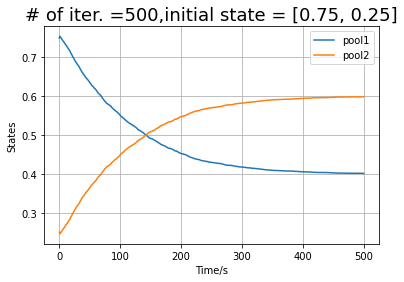

In [ ]:
# Visualization
state_list = np.array(state_list)

fig,ax = plt.subplots()
ax.plot(state_list[:,0], label='pool1')
ax.plot(state_list[:,1], label='pool2')

ax.set_xlabel('Time/s')
ax.set_ylabel('States')
ax.set_title('# of iter. =' + str(iteration_number) + ',' + 'initial state = ' + str(initial_state), fontsize=18)
ax.grid()
ax.legend();

***Visulization:***

You are asked to visulize the development of states corresponding to iteration times. 
You should try different parameters:
1. initial_state = [0.75, 0.25], iteration = 50
2. initial_state = [0.45, 0.55], iteration = 500

and then explain the differences and reasons cause these differences.

Your figure should be something like the picture I showed below:

<img src="https://i.loli.net/2021/09/17/4tNMopZQybA8cBe.png" ></a>

***Visualization:***

1. initial_state = [0.75, 0.25], iteration = 50

<div>
<img src="https://i.loli.net/2021/11/12/Dc36p1yWaJbYnoj.jpg",width="290", height="290">

2. initial_state = [0.45, 0.55], iteration = 500

<img src="https://i.loli.net/2021/11/11/aCP8yTDL7lsqR6o.png" >

***Explanation:***

The three visualizations above shows the convergence process of the propotion of miners in each minning pool. We can see that no matter we change the iteration times or the initial distribution of the miners, the propotion will converge eventually, which is 60% miners in pool2 and 40% miners in pool1.